In [1]:
import pandas as pd # for data processing, I/O
import numpy as np # Linear algrebra 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#load insurence dataset to a data frame. 
df= pd.read_csv('insurance-data.csv', sep=',')

#Get the size of the dataset 
df.shape

(1338, 8)

In [3]:
# Get the preview of data 
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
# describe the dataset using descriptive statistics
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
# Check for Null values 
nulls = set(df.columns[df.isnull().mean()>0])
nulls

set()

In [3]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

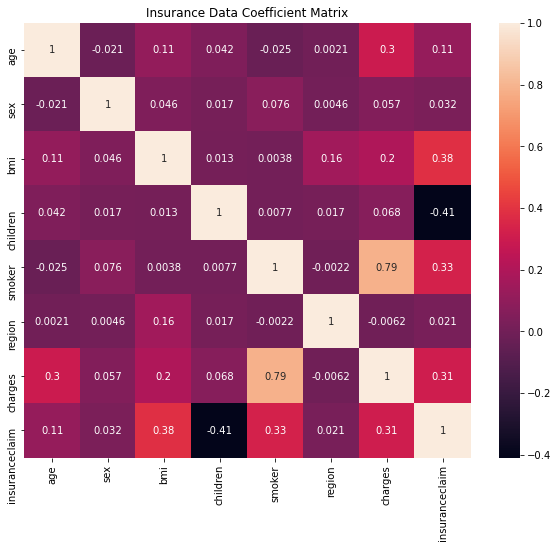

In [5]:
inCoeffMatrix = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(data=inCoeffMatrix, annot=True)
plt.title('Insurance Data Coefficient Matrix')
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'charges'}>,
        <AxesSubplot:title={'center':'insuranceclaim'}>, <AxesSubplot:>]],
      dtype=object)

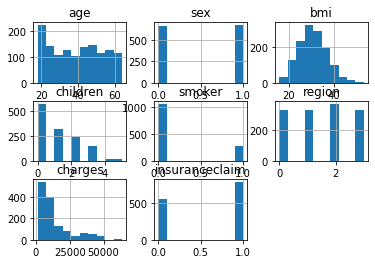

In [3]:
df.hist()

In [4]:
""" 
derive the age group 
 age 0-14 then 'child'
 age 15-24 then 'Youth'
 age 25-64 then 'adult'
 age 65 < then 'senior'

"""

def age_to_age_class(age):
    if 0 < age <= 14:
        age_class = "Child"
    elif 14 < age <= 24:
        age_class = "Youth"
    elif 24 < age <= 64:
        age_class = "Adult"
    else:
        age_class = "Senior"
    
    return age_class

#print(age_to_age_class(65))

df["age_class"] = df["age"].apply(age_to_age_class)
df.head()

#df = df.rename(columns={'age_group': 'age_class'})

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,age_class
0,19,0,27.900,0,1,3,16884.92400,1,Youth
1,18,1,33.770,1,0,2,1725.55230,1,Youth
2,28,1,33.000,3,0,2,4449.46200,0,Adult
3,33,1,22.705,0,0,1,21984.47061,0,Adult
4,32,1,28.880,0,0,1,3866.85520,1,Adult


In [5]:
"""
weight status based on BMI 
  Below 18.5 then overweight 
  18.5-24.9 then Normal 
  25.0-29.9 then Overweight
  30.0 and higher then Obesity 
  
referance: https://www.mayoclinic.org/diseases-conditions/obesity/symptoms-causes/syc-20375742
"""

def get_weight_class(bmi):
    if bmi < 18.5:
        weight_class = "Underweight"
    elif 18.5<= bmi <= 24.9:
        weight_class = "Normal"
    elif 25.0 <= bmi <= 29.9:
        weight_class = "Overweight"
    else:
        weight_class = "Obesity"
        
    return weight_class

print(get_weight_class(30))

df["weight_class"] = df["bmi"].apply(get_weight_class)

df.head()


Obesity


,age,sex,bmi,children,smoker,region,charges,insuranceclaim,age_class,weight_class
0,19,0,27.900,0,1,3,16884.92400,1,Youth,Overweight
1,18,1,33.770,1,0,2,1725.55230,1,Youth,Obesity
2,28,1,33.000,3,0,2,4449.46200,0,Adult,Obesity
3,33,1,22.705,0,0,1,21984.47061,0,Adult,Normal
4,32,1,28.880,0,0,1,3866.85520,1,Adult,Overweight


In [29]:
# get_sex_char

def get_sex_string(sex):
    if sex == 0:
        sex_char = "female"
    else:
        sex_char = "male"
        
    return sex_char    

#print (get_sex_string(0))
df["sex_char"] = df["sex"].apply(get_sex_string)

df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,age_class,weight_class,sex_char
0,19,0,27.900,0,1,3,16884.92400,1,Youth,Overweight,female
1,18,1,33.770,1,0,2,1725.55230,1,Youth,Obesity,male
2,28,1,33.000,3,0,2,4449.46200,1,Adult,Obesity,male
3,33,1,22.705,0,0,1,21984.47061,1,Adult,Normal,male
4,32,1,28.880,0,0,1,3866.85520,1,Adult,Overweight,male


In [30]:
# get_smoker_char

def get_smoker_string(smoker):
    if smoker == 0:
        smoker_char = "non_smoker"
    else:
        smoker_char = "smoker"
        
    return smoker_char    

#print (get_sex_string(0))
df["smoker_char"] = df["smoker"].apply(get_smoker_string)

df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,age_class,weight_class,sex_char,smoker_char
0,19,0,27.900,0,1,3,16884.92400,1,Youth,Overweight,female,smoker
1,18,1,33.770,1,0,2,1725.55230,1,Youth,Obesity,male,non_smoker
2,28,1,33.000,3,0,2,4449.46200,1,Adult,Obesity,male,non_smoker
3,33,1,22.705,0,0,1,21984.47061,1,Adult,Normal,male,non_smoker
4,32,1,28.880,0,0,1,3866.85520,1,Adult,Overweight,male,non_smoker


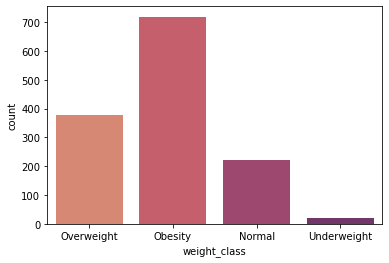

In [32]:
# bar chart BMI status againt count who claimed insurance 

# firstly filter the insurance claimed 
claimed = df[df["insuranceclaim"] == 1]

#claimed
ax = sns.countplot(x="weight_class", data=claimed, palette="flare")


(0.0, 210.0)

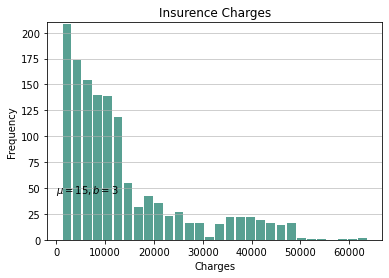

In [21]:
# charges distibution histogram 

d = df["charges"]

n, bins, patches = plt.hist(x=d, bins='auto', color='#117864',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Insurence Charges')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [22]:
#Let's write a function to plot the bar charts
def plot_bar(df, group_by_col, value_col, title):
    '''
    INPUT
    df - data frame
    group_by_col - column to be grouped by 
    value_col - value to take the mean
    title - Title of the chart
    .....
    OUTPUT
    None. Just draws the chart
    
    This function plots a bar chart based on a given grouping logic
    ....
    '''
    gk = df.groupby(group_by_col).mean()[[value_col]]
    print(gk)
    (gk/df.shape[0]).plot(kind="bar");
    plt.title(title);




             charges
region              
0       13406.384516
1       12417.575374
2       14735.411438
3       12346.937377


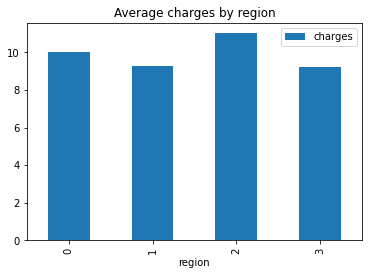

In [41]:
# region distribution against claims 
 
plot_bar(claimed,"region","charges","Average charges by region")    



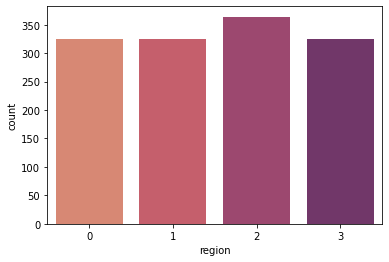

In [42]:
ax = sns.countplot(x="region", data=claimed, palette="flare")

                   charges
weight_class              
Normal        10379.499732
Obesity       15479.549773
Overweight    10993.994037
Underweight    8852.200585


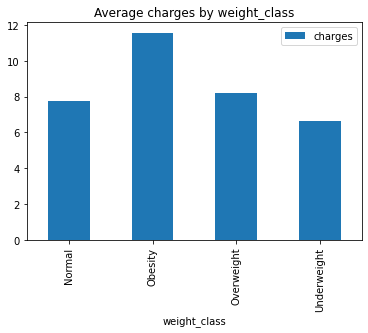

In [25]:
# Claims with BMI

plot_bar(claimed, "weight_class", "charges", "Average charges by weight_class" )

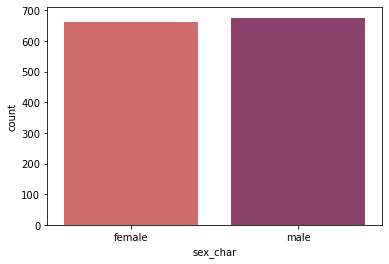

In [33]:
# Claims with Sex

ax = sns.countplot(x="sex_char", data=claimed, palette="flare")


                  charges
smoker_char              
non_smoker    8434.268298
smoker       32050.231832


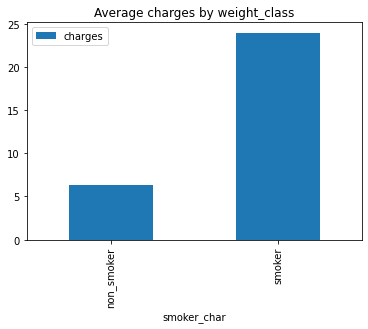

In [37]:


plot_bar(claimed, "smoker_char", "charges", "Average charges by weight_class")



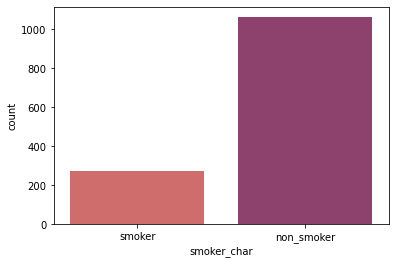

In [38]:
ax = sns.countplot(x="smoker_char", data=claimed, palette="flare")


In [39]:
claimed

# Claims with 

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,age_class,weight_class,sex_char,smoker_char
0,19,0,27.900,0,1,3,16884.92400,1,Youth,Overweight,female,smoker
1,18,1,33.770,1,0,2,1725.55230,1,Youth,Obesity,male,non_smoker
2,28,1,33.000,3,0,2,4449.46200,1,Adult,Obesity,male,non_smoker
3,33,1,22.705,0,0,1,21984.47061,1,Adult,Normal,male,non_smoker
4,32,1,28.880,0,0,1,3866.85520,1,Adult,Overweight,male,non_smoker
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,1,Adult,Obesity,male,non_smoker
1334,18,0,31.920,0,0,0,2205.98080,1,Youth,Obesity,female,non_smoker
1335,18,0,36.850,0,0,2,1629.83350,1,Youth,Obesity,female,non_smoker
1336,21,0,25.800,0,0,3,2007.94500,1,Youth,Overweight,female,non_smoker


In [ ]:
# corelation value (if both neumerical)
# chi-square value (if both categorical)
# ---------------- (if one neumerical, one categorical)

In [ ]:
# Insirance claims 